In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
print("Shape:",df.shape)
print("\n Columns:",df.columns)
df.info()

Shape: (20640, 10)

 Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

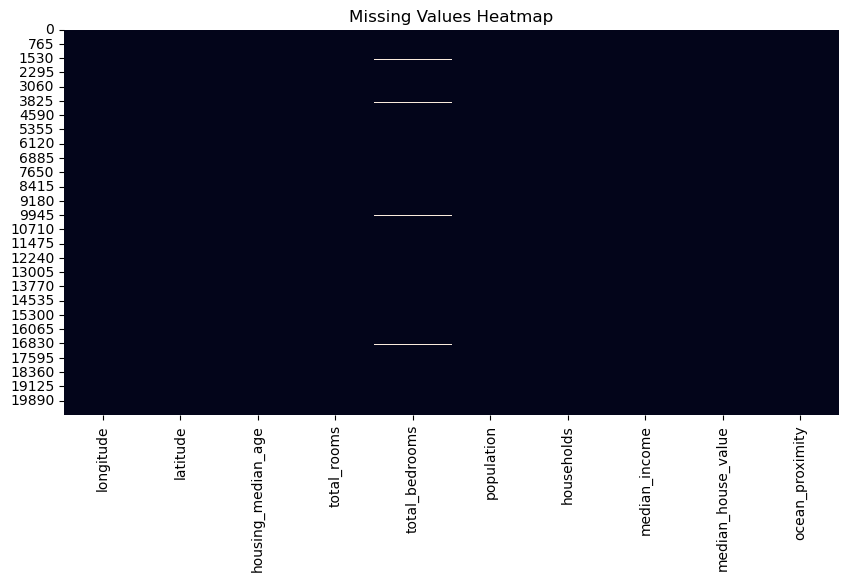

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


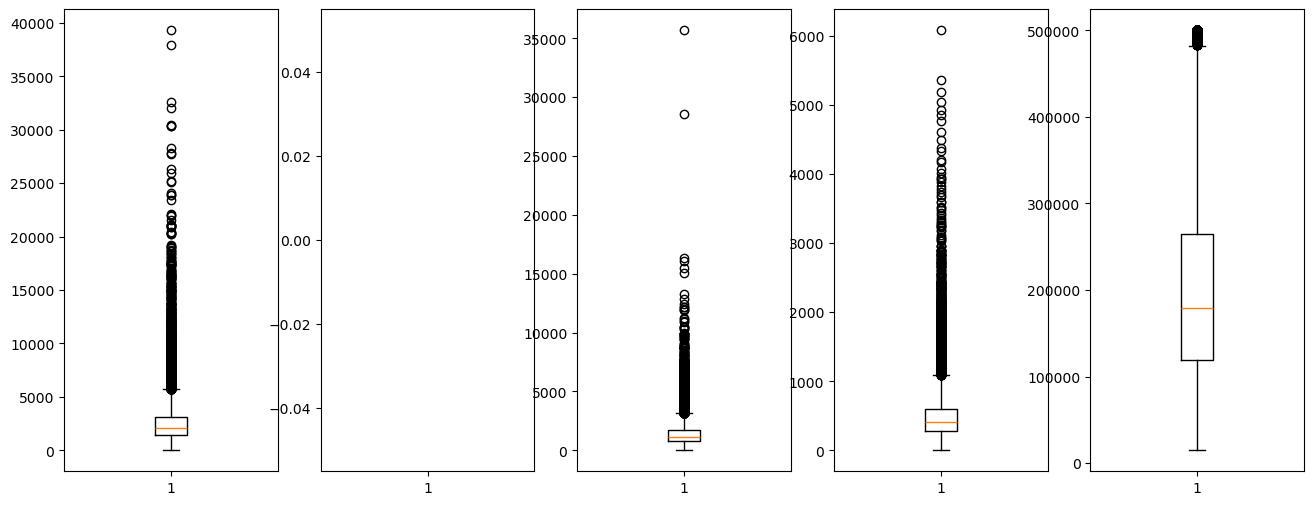

In [21]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(df.total_rooms)
axs[1].boxplot(df.total_bedrooms)
axs[2].boxplot(df.population)
axs[3].boxplot(df.households)
axs[4].boxplot(df.median_house_value)
plt.show()

In [22]:
df["total_bedrooms"].isnull().sum()

207

In [23]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [24]:
df["total_bedrooms"]=pd.to_numeric(df["total_bedrooms"],errors="coerce")

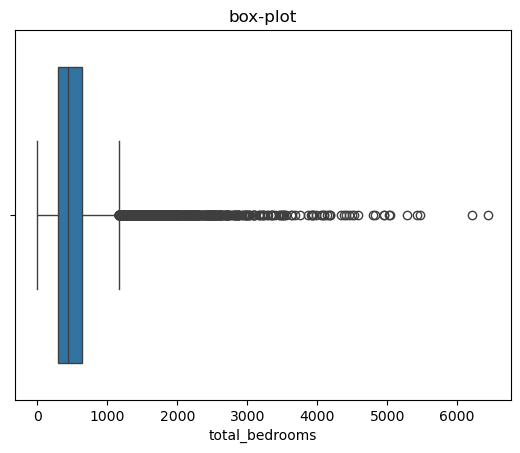

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["total_bedrooms"])
plt.title("box-plot")
plt.show()

In [26]:
import numpy as np
df["total_rooms"]=np.log1p(df["total_rooms"])
df["total_rooms"]=np.log1p(df["total_bedrooms"])
df["total_rooms"]=np.log1p(df["population"])
df["total_rooms"]=np.log1p(df["households"])

In [27]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

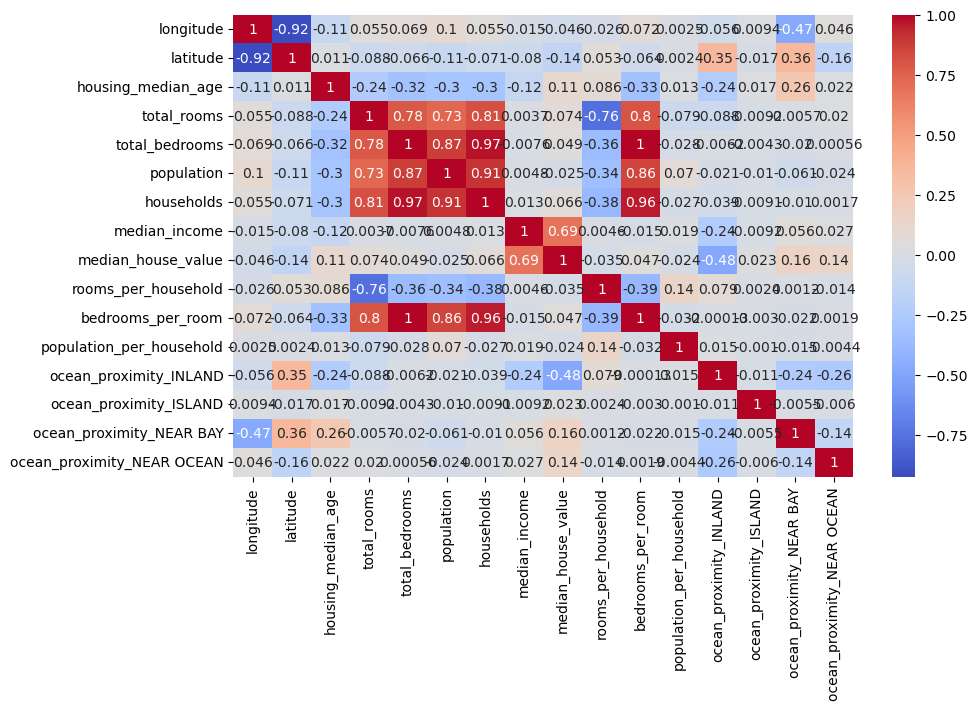

In [38]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [30]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MAE: 50337.07174783759


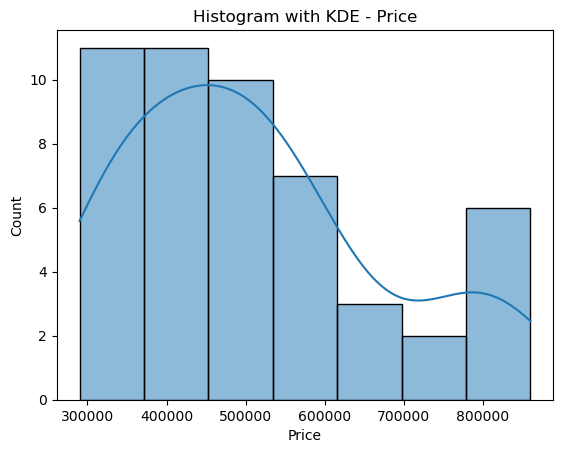

Skewness: 0.670237824460702
Kurtosis: -0.46999906169438965


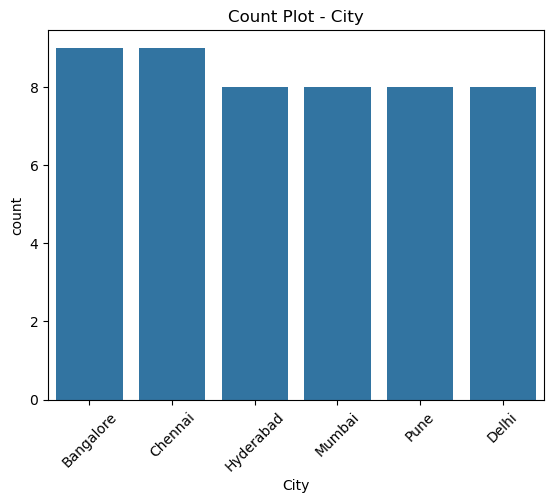

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
df = pd.read_csv("house.csv")
plt.figure()
sns.histplot(df["Price"], kde=True)
plt.title("Histogram with KDE - Price")
plt.show()
print("Skewness:", skew(df["Price"].dropna()))
print("Kurtosis:", kurtosis(df["Price"].dropna()))
plt.figure()
sns.countplot(x=df["City"])
plt.title("Count Plot - City")
plt.xticks(rotation=45)
plt.show()


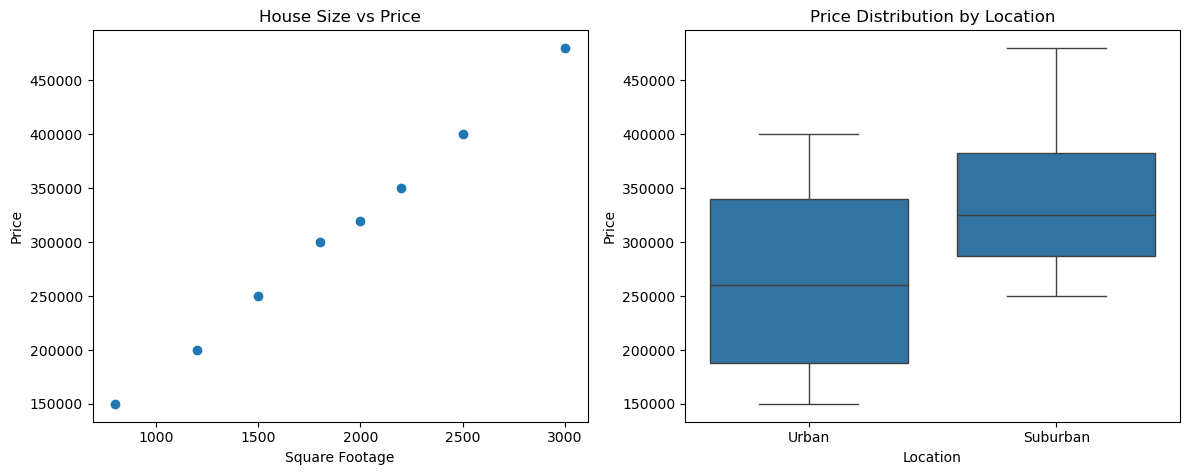

Observation:
As square footage increases, house prices tend to increase.
Suburban houses show slightly higher price variation compared to Urban houses.


In [8]:
#task 2
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "SquareFootage": [800, 1200, 1500, 1800, 2000, 2200, 2500, 3000],
    "Price": [150000, 200000, 250000, 300000, 320000, 350000, 400000, 480000],
    "Location": ["Urban", "Urban", "Suburban", "Suburban", "Urban", "Suburban", "Urban", "Suburban"]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df["SquareFootage"], df["Price"])
plt.title("House Size vs Price")
plt.xlabel("Square Footage")
plt.ylabel("Price")

plt.subplot(1,2,2)
sns.boxplot(x=df["Location"],y=df["Price"])
plt.title("Price Distribution by Location")
plt.suptitle("")  # Remove automatic title

plt.tight_layout()
plt.show()
print("Observation:")
print("As square footage increases, house prices tend to increase.")
print("Suburban houses show slightly higher price variation compared to Urban houses.")

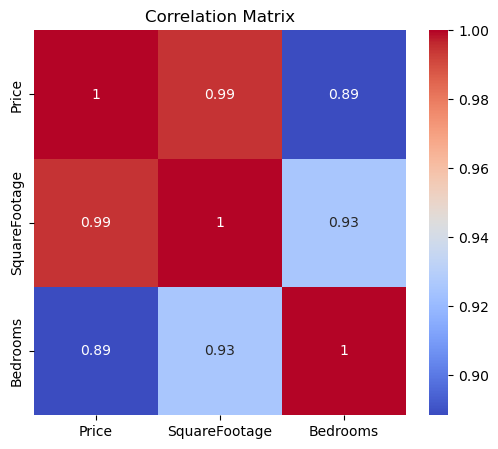

Strong Correlations (> 0.8):
SquareFootage and Price: 0.99
Bedrooms and Price: 0.89
Price and SquareFootage: 0.99
Bedrooms and SquareFootage: 0.93
Price and Bedrooms: 0.89
SquareFootage and Bedrooms: 0.93


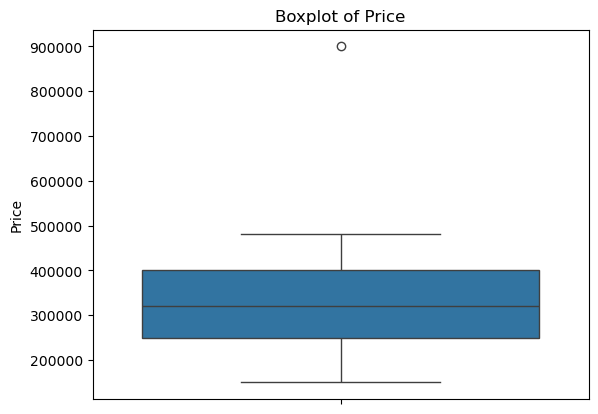


Observation:
Price and SquareFootage show a strong positive correlation.
There is a high-price outlier which may influence the average.


In [9]:
#rask 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    "Price": [150000, 200000, 250000, 300000, 320000, 350000, 400000, 480000, 900000],
    "SquareFootage": [800, 1200, 1500, 1800, 2000, 2200, 2500, 3000, 5000],
    "Bedrooms": [2, 3, 3, 4, 4, 4, 5, 5, 6]
}
df = pd.DataFrame(data)
corr_matrix = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
print("Strong Correlations (> 0.8):")
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > 0.8:
            print(f"{row} and {col}: {corr_matrix.loc[row, col]:.2f}")
plt.figure()
sns.boxplot(y=df["Price"])
plt.title("Boxplot of Price")
plt.show()
print("\nObservation:")
print("Price and SquareFootage show a strong positive correlation.")
print("There is a high-price outlier which may influence the average.")